In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
acc_df = pd.read_csv('faccount.txt')
txn_df = pd.read_csv('ftxn2.txt')

print("Size of accounts df: ", acc_df.shape)
print("Size of transactions df: ", txn_df.shape)

Size of accounts df:  (2000, 12)
Size of transactions df:  (423180, 9)


In [3]:
acc_df.head()

,ACCTID,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
0,800039,BUSINESS,Young Supermarket,Kevin,Young,1982-02-23T00:00:00,2018-09-20T00:00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket
1,800040,BUSINESS,Williams Grocery,Lindsay,Williams,1959-02-20T00:00:00,2018-02-24T00:00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery
2,800041,CREDIT,Myers Supermarket,Lisa,Myers,1982-09-04T00:00:00,2018-01-11T00:00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket
3,800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,1976-10-11T00:00:00,2018-12-04T00:00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket
4,800043,CREDIT,Taylor Grocery,David,Taylor,1978-01-23T00:00:00,2019-07-15T00:00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery


In [4]:
txn_df.head()

,TXN_ID,TXTYPE,AMOUNT,FROMACCTID,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED
0,950060711303,PAYMENT,320,500607,800242,2020-01-22T17:00:00,Dinner with Shane,N,Y
1,950060711401,PAYMENT,48,500607,800111,2020-01-23T08:00:00,Breakfast with Steven,N,Y
2,950060711402,TRANSFER,6209,500607,500929,2020-01-23T13:00:00,Holiday Cost,N,Y
3,950060711403,PAYMENT,66,500607,800252,2020-01-23T17:00:00,Meal with Mary,N,Y
4,950060711501,PAYMENT,47,500607,800116,2020-01-24T08:00:00,Coffee with Brian,N,Y


In [5]:
acc_df['FULLNAME'] = acc_df['FIRSTNAME'] + ' ' + acc_df['SURNAME']
acc_df.head()

,ACCTID,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY,FULLNAME
0,800039,BUSINESS,Young Supermarket,Kevin,Young,1982-02-23T00:00:00,2018-09-20T00:00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket,Kevin Young
1,800040,BUSINESS,Williams Grocery,Lindsay,Williams,1959-02-20T00:00:00,2018-02-24T00:00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery,Lindsay Williams
2,800041,CREDIT,Myers Supermarket,Lisa,Myers,1982-09-04T00:00:00,2018-01-11T00:00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket,Lisa Myers
3,800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,1976-10-11T00:00:00,2018-12-04T00:00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket,Brittany Martinez
4,800043,CREDIT,Taylor Grocery,David,Taylor,1978-01-23T00:00:00,2019-07-15T00:00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery,David Taylor


In [6]:
grouped = acc_df.groupby(['FULLNAME'])
multiple_acct = grouped.filter(lambda x: x['ACCTID'].count() > 1)
multiple_acct = multiple_acct[['ACCTID','FULLNAME', 'ACCTNAME', 'ACCTCREATED', 'ADDRESS_LAT', 'ADDRESS_LON']].sort_values('FULLNAME')

In [7]:
multiple_acct.to_csv('same_fullname.csv')

In [8]:
multiple_acct_ids = multiple_acct['ACCTID']
total_amount = pd.DataFrame()
total_amount['ID'] = multiple_acct_ids

for acct_id in multiple_acct_ids:
  total_amount.loc[total_amount['ID'] == acct_id, 'total_sent'] = txn_df[txn_df['FROMACCTID'] == acct_id]['AMOUNT'].sum()
  total_amount.loc[total_amount['ID'] == acct_id, 'total_received'] = txn_df[txn_df['TOACCTID'] == acct_id]['AMOUNT'].sum()

In [9]:
multiple_acct_final = pd.merge(multiple_acct, total_amount, left_on='ACCTID', right_on='ID').drop('ID', axis=1)

In [10]:
multiple_acct_final.to_csv('same_fullname_with_total.csv')

In [11]:
self_to_self_df = txn_df[txn_df['FROMACCTID'] == txn_df['TOACCTID']]
print('Sum Self to Self Amount:', self_to_self_df['AMOUNT'].sum())
print('Count Self to Self Amount:', self_to_self_df['AMOUNT'].count())

Sum Self to Self Amount: 497165
Count Self to Self Amount: 101


In [12]:
self_to_self_df.shape

(101, 9)

In [13]:
import seaborn as sns

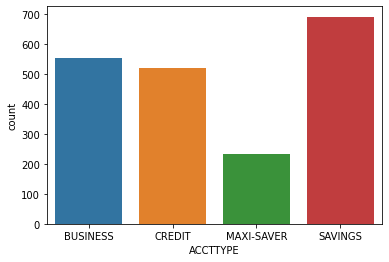

In [14]:
sns.countplot(data=acc_df, x='ACCTTYPE')

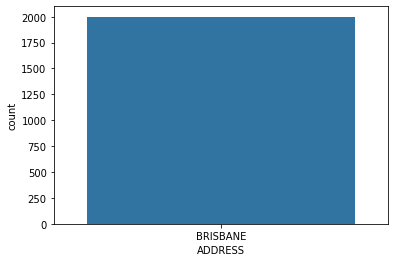

In [15]:
sns.countplot(data=acc_df, x='ADDRESS')

Approaches:
  1. Get the distance based on the latlog (might not work as all is based in Brisbane)
  2. Get the average interval between transactions for every sender to see anomalies
  3. NLP technique analysing the transaction reference with account category
  4. Find anomalies based on transfers amount for each sender
  5. Mark target senders with specific age group (based on perpretrators age group from research)

In [16]:
# NetworkX approach

import networkx as nx

G = nx.DiGraph()

accts = txn_df['FROMACCTID'].unique()
accts = np.append(txn_df['TOACCTID'].unique(), accts)

In [ ]:
G = nx.DiGraph()

for idx, row in txn_df.iterrows():
  G.add_edge(row['FROMACCTID'], row['TOACCTID'])

nx.draw(G)